# Customer Segmentation : Clustering Project

This project focuses on using Principal Component Analysis (PCA) and Agglomerative Clustering to group customers into distinct segments. By doing so, we aim to reveal valuable insights about customer behaviors and preferences that can inform marketing strategies and improve customer experiences.

### Importing Libraries 

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import datetime
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

### Dataset

In [56]:
data=pd.read_csv(r"C:\Users\babua\OneDrive\Desktop\project 2\marketing_campaign.csv",sep='\t')
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [57]:
len(data)

2240

### Data Cleaning

In [58]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

since the amount of null value is small we can remove that 

In [59]:
data.dropna(axis=0,inplace=True)

In [60]:
data.duplicated().sum()

0

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [62]:
#removing 'mnt' from column names
data=data.rename(columns={'MntWines':'Wines','MntFruits':'Fruits','MntMeatProducts':'MeatProduct','MntFishProducts':'FishProduct',
                       'MntSweetProducts':'SweetProduct','MntGoldProds':'Gold'})

In [63]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'MeatProduct',
       'FishProduct', 'SweetProduct', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

### Feature Engineering

we are going to change the dtype of column DT_customer to datetime because the column contain information about date of customers who become part of the firm

In [64]:
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'],format="%d-%m-%Y")

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   Wines                2216 non-null   int64         
 10  Fruits               2216 non-null   int64         
 11  MeatProduct          2216 non-null   int64         
 12  FishProduct          2216 non-null   int64         
 13  SweetProduct         2216 non-null   i

 Adding a new column spent by taking sum of all purshaced items

In [66]:
data['Spent']=data.Wines+data.Fruits+data.MeatProduct+data.FishProduct+data.SweetProduct+data.Gold

In [67]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,422


In [68]:
#Adding a new column children by taking sum of column kidhome and teenhome
data['Children']=data.Kidhome+data.Teenhome

In [69]:
#Adding a new column age 
data['Age']=2023-data['Year_Birth']

In [70]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

here we are going to replace the values with single and partner

In [71]:
data['Marital_Status']=data['Marital_Status'].replace({'Married':'Partner','Together':'Partner','Single':'Single',
                                                              'Divorced':'Single','Widow':'Single','Alone':'Single','Absurd':'Single',
                                                             'YOLO':'Single' })

In [72]:
data['Marital_Status'].unique()

array(['Single', 'Partner'], dtype=object)

In [73]:
data.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

here we change education into 3 category Under GRaduate and Post Graduate and Graduate

In [74]:
data.Education=data.Education.replace({'Graduation':'Graduate','PhD':'PostGraduate','Master':'PostGraduate',
                                       'Basic':'UnderGraduate','2n Cycle':'UnderGraduate'})

In [75]:
data.Education.unique()

array(['Graduate', 'PostGraduate', 'UnderGraduate'], dtype=object)

In [76]:
#adding new column family count
data['familycount']=data['Marital_Status'].replace({"Single":1,"Partner":2})+data['Children']

In [77]:
#adding column is_parent
data['Is_Parent']=np.where(data.Children>0,1,0)

In [78]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spent,Children,Age,familycount,Is_Parent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,1617,0,66,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,27,2,69,3,1
2,4141,1965,Graduate,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,776,0,58,2,0
3,6182,1984,Graduate,Partner,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,53,1,39,3,1
4,5324,1981,PostGraduate,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,422,1,42,3,1


In [79]:
#removing unwanted columns
drop=['ID','Dt_Customer','Z_CostContact','Complain','Z_Revenue','Year_Birth']
data.drop(drop,axis=1,inplace=True)

In [80]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,MeatProduct,FishProduct,SweetProduct,Gold,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Spent,Children,Age,familycount,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.074007,0.073105,0.064079,0.013538,0.150271,607.075361,0.947202,54.179603,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.261842,0.260367,0.244950,0.115588,0.357417,602.900476,0.749062,11.985554,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,27.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,46.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,396.500000,1.000000,53.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1048.000000,1.000000,64.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,3.000000,130.000000,5.000000,1.000000


here we can see that there is some probelm with mean and max of age and income column

C:\Users\babua\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


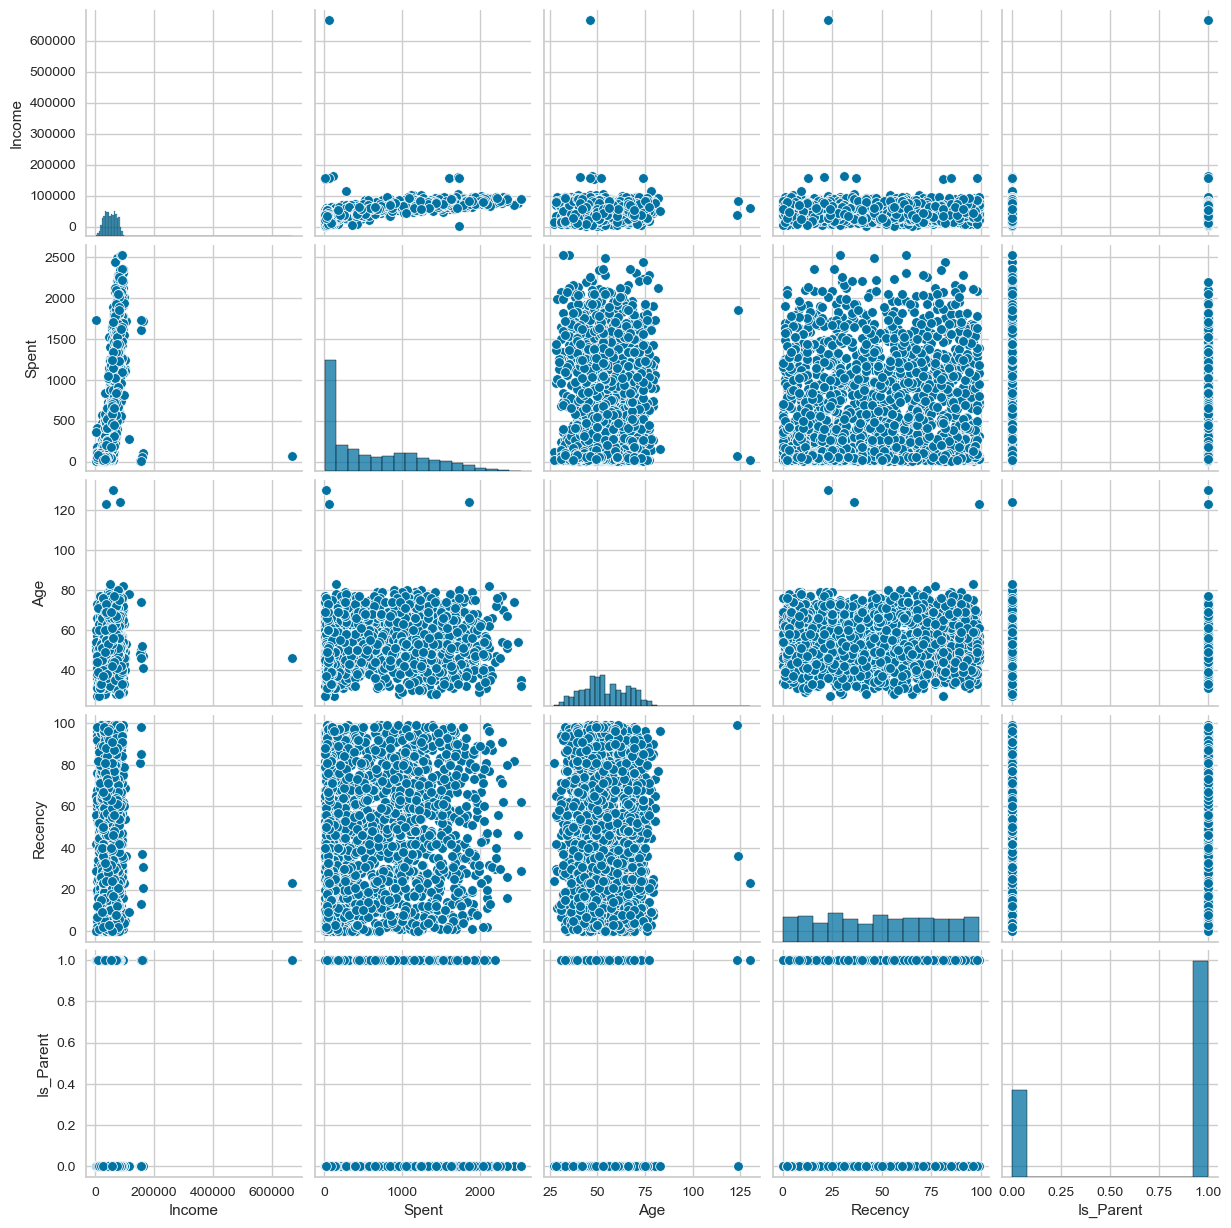

In [81]:
#pairplot to see the outliers mentioned above
c=['Income','Spent','Age','Recency','Is_Parent',]
sns.pairplot(data[c])
plt.show()

from the plot we can see that there is some outliers in age and income so we need to remove it

In [82]:
data=data[data['Age']<90]
data=data[data['Income']<600000]

In [83]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,MeatProduct,FishProduct,SweetProduct,Gold,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Spent,Children,Age,familycount,Is_Parent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,...,0.074141,0.072785,0.064195,0.013562,0.150542,607.268083,0.947559,54.086347,2.593128,0.714286
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,...,0.262060,0.259842,0.245156,0.115691,0.357683,602.513364,0.749466,11.701599,0.906236,0.451856
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,27.000000,1.000000,0.000000
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,46.000000,2.000000,0.000000
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,397.000000,1.000000,53.000000,3.000000,1.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1048.000000,1.000000,64.000000,3.000000,1.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,3.000000,83.000000,5.000000,1.000000


C:\Users\babua\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


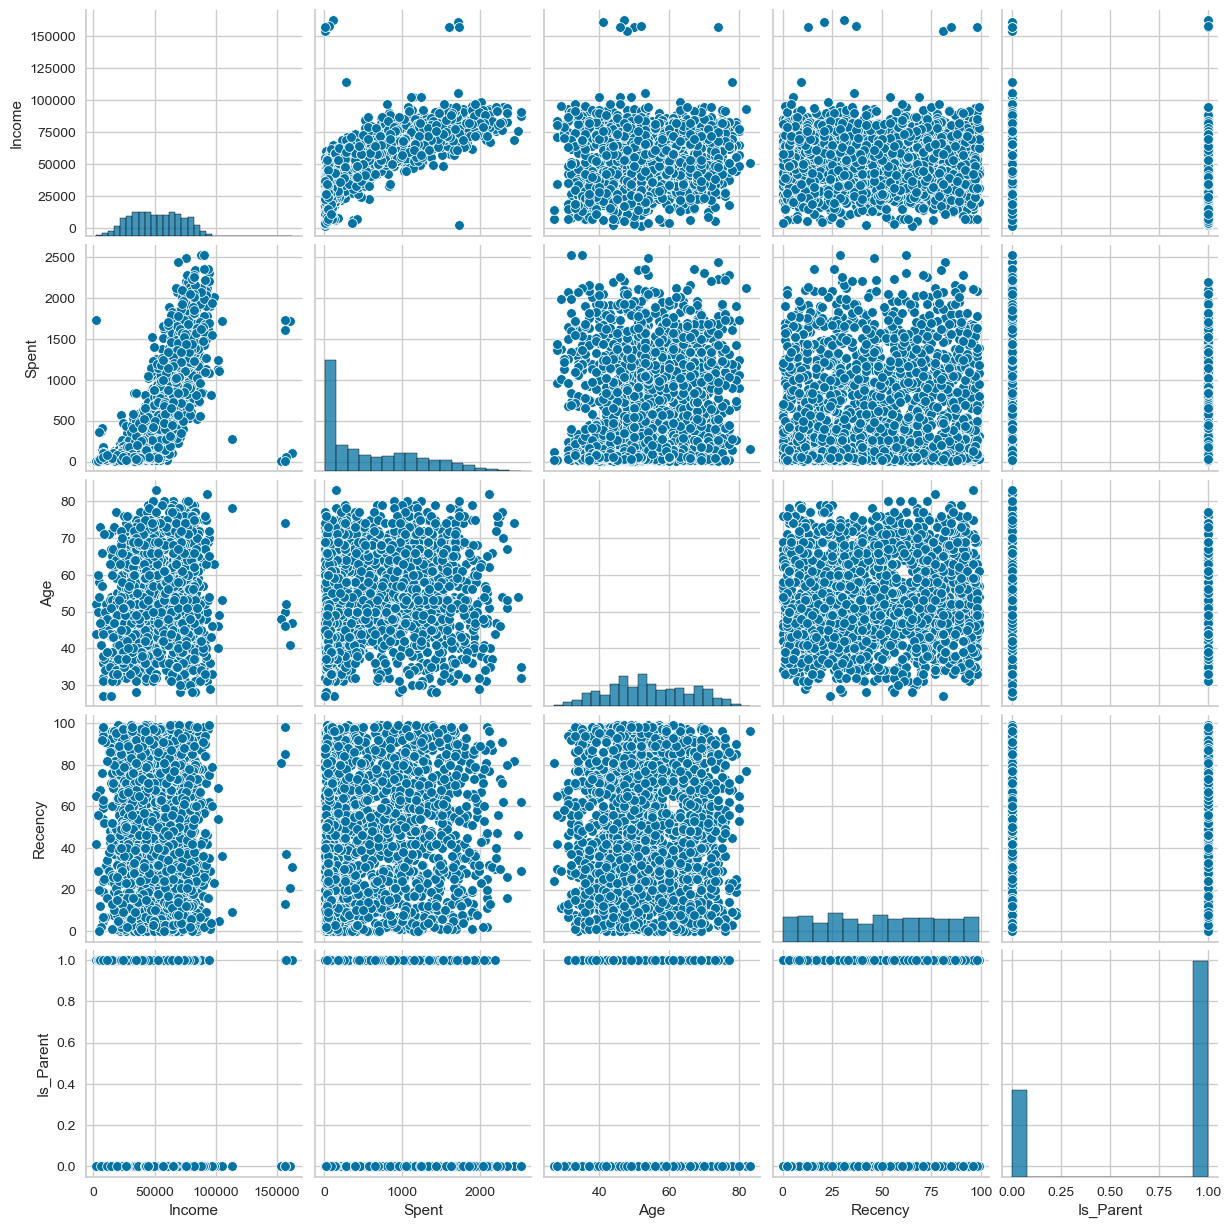

In [84]:
c=['Income','Spent','Age','Recency','Is_Parent',]
sns.pairplot(data[c])
plt.show()

Now there is no outliers in this data

<Axes: >

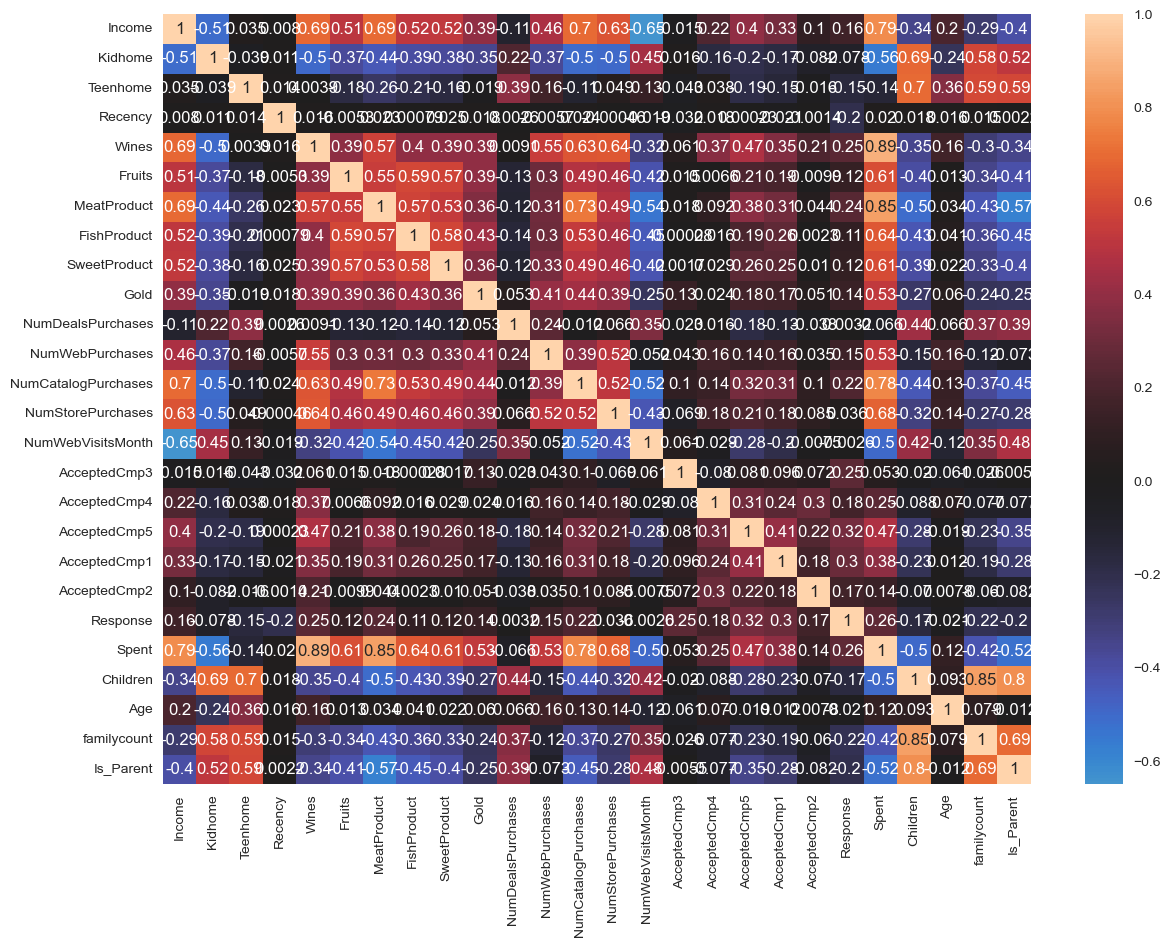

In [85]:
#Correlation
numeric_data = data.select_dtypes(include=['number'])
cor=numeric_data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cor,annot=True,center=0)

### Data Preprocessing

In [86]:
object_columns = data.select_dtypes(include=['object'])
oc=list(object_columns.columns)
oc

['Education', 'Marital_Status']

 we need to encode the categorical value to numeric,here we use labelencoder for encoding

In [87]:
le=LabelEncoder()
for i in oc:
    data[i]=le.fit_transform(data[i])


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int32  
 1   Marital_Status       2212 non-null   int32  
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   Wines                2212 non-null   int64  
 7   Fruits               2212 non-null   int64  
 8   MeatProduct          2212 non-null   int64  
 9   FishProduct          2212 non-null   int64  
 10  SweetProduct         2212 non-null   int64  
 11  Gold                 2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   int64 

Feature Scaling

In [89]:
df=data.copy()

In [90]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,MeatProduct,FishProduct,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Spent,Children,Age,familycount,Is_Parent
0,0,1,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,1617,0,66,1,0
1,0,1,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,27,2,69,3,1
2,0,0,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,776,0,58,2,0
3,0,0,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,53,1,39,3,1
4,1,0,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,422,1,42,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,0,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,1341,1,56,3,1
2236,1,0,64014.0,2,1,56,406,0,30,0,...,0,0,1,0,0,444,3,77,5,1
2237,0,1,56981.0,0,0,91,908,48,217,32,...,1,0,0,0,0,1241,0,42,1,0
2238,1,0,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,843,1,67,3,1


In [91]:
#here we are going to remove promotions from our dataset 
dr=['Response','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']
df=df.drop(dr,axis=1)

In [92]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,MeatProduct,FishProduct,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent,Children,Age,familycount,Is_Parent
0,0,1,58138.0,0,0,58,635,88,546,172,...,3,8,10,4,7,1617,0,66,1,0
1,0,1,46344.0,1,1,38,11,1,6,2,...,2,1,1,2,5,27,2,69,3,1


In [93]:
#feature scaling using StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)

In [94]:
scaled_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,MeatProduct,FishProduct,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent,Children,Age,familycount,Is_Parent
0,-0.893586,1.349603,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,...,0.351030,1.426865,2.503607,-0.555814,0.692181,1.676245,-1.264598,1.018352,-1.758359,-1.581139
1,-0.893586,1.349603,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,...,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-0.963297,1.404572,1.274785,0.449070,0.632456
2,-0.893586,-0.740959,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,...,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.280110,-1.264598,0.334530,-0.654644,-1.581139
3,-0.893586,-0.740959,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,...,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-0.920135,0.069987,-1.289547,0.449070,0.632456
4,0.571657,-0.740959,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,...,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.307562,0.069987,-1.033114,0.449070,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,-0.740959,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,...,-0.168701,1.791619,0.111982,-0.555814,-0.132545,1.218061,0.069987,0.163575,0.449070,0.632456
2208,0.571657,-0.740959,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,...,2.429954,1.426865,-0.229679,-0.248141,0.692181,-0.271040,2.739158,1.958607,2.656499,0.632456
2209,-0.893586,1.349603,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,...,-0.688432,-0.761665,0.111982,2.213242,0.279818,1.052052,-1.264598,-1.033114,-1.758359,-1.581139
2210,0.571657,-0.740959,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,...,-0.168701,0.697355,0.795303,1.290224,-0.957271,0.391336,0.069987,1.103830,0.449070,0.632456


### Dimensionality Reduction

here we reduce the dimension of the dataset to 3-Dimension for visualizing

In [95]:
pca=PCA(n_components=3)
pca_df=pca.fit_transform(scaled_df)
pca_df=pd.DataFrame(pca_df,columns=['col1','col2','col3'])


In [96]:
pca_df.head(5)

,col1,col2,col3
0,4.936893,-0.409386,1.151673
1,-2.835612,0.211780,0.720182
2,2.625005,-0.689752,-0.104759
3,-2.620426,-1.344144,-1.130451
4,-0.627495,0.286282,-1.245779


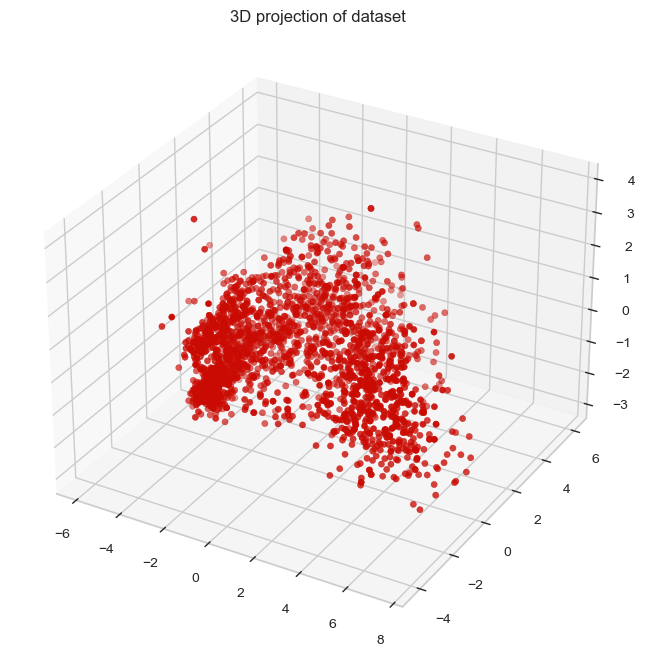

In [122]:
#visualizing the dataset
x=pca_df.col1
y=pca_df.col2
z=pca_df.col3
plt.figure(figsize=(10,8))
ax=plt.subplot(111,projection='3d')#added a 3d subplot
ax.scatter(x,y,z,c='r',marker='o')
plt.title('3D projection of dataset')
plt.show()


### Clustering

C:\Users\babua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\babua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\babua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\babua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

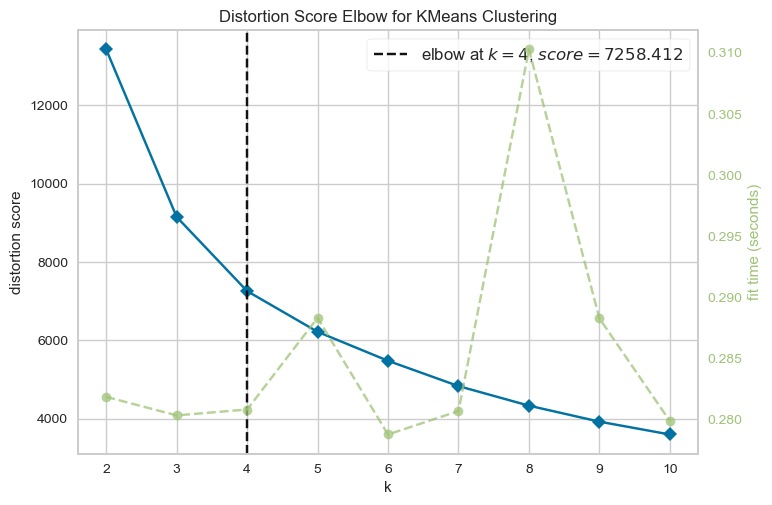

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [98]:
#with elbow method we are going to find number of clusters needed
elbow=KElbowVisualizer(KMeans(),k=10)
elbow.fit(pca_df)
elbow.show()

from the plot value of k=4

making cluster using Agglomerative clustering model

In [99]:
ag=AgglomerativeClustering(n_clusters=4)
y_pred=ag.fit_predict(pca_df)

In [100]:
pca_df['cluster']=y_pred
data['cluster']=y_pred

In [102]:
pca_df.head(5)

,col1,col2,col3,cluster
0,4.936893,-0.409386,1.151673,2
1,-2.835612,0.211780,0.720182,1
2,2.625005,-0.689752,-0.104759,2
3,-2.620426,-1.344144,-1.130451,1
4,-0.627495,0.286282,-1.245779,0


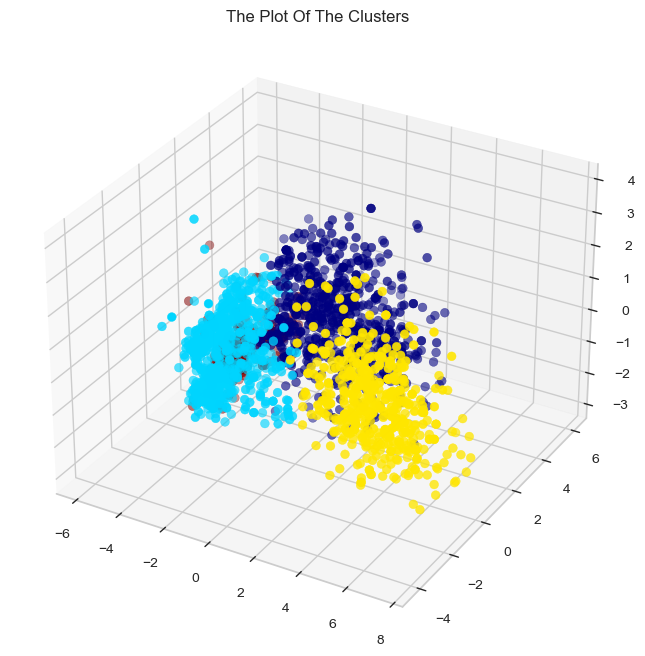

In [118]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="laa")
ax.scatter(x, y, z, s=40, c=pca_df["cluster"], marker='o',cmap= 'jet' )
ax.set_title("The Plot Of The Clusters")
plt.show()


### Evaluation

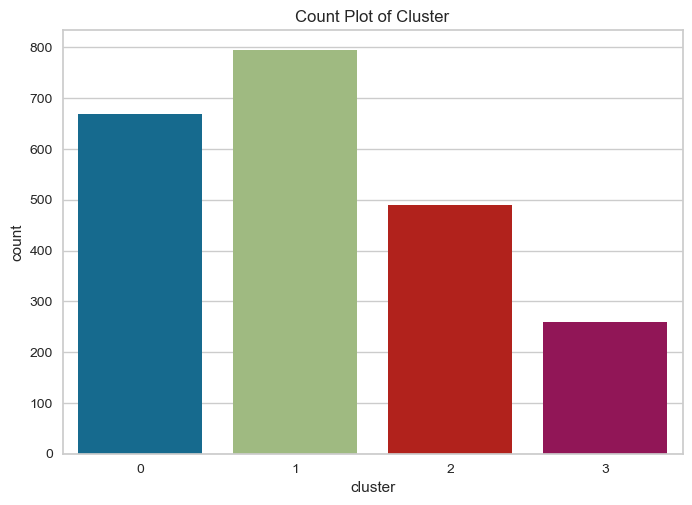

In [123]:
#plotting countplot of cluster
sns.countplot(x=data['cluster'])
plt.title('Count Plot of Cluster')
plt.show()

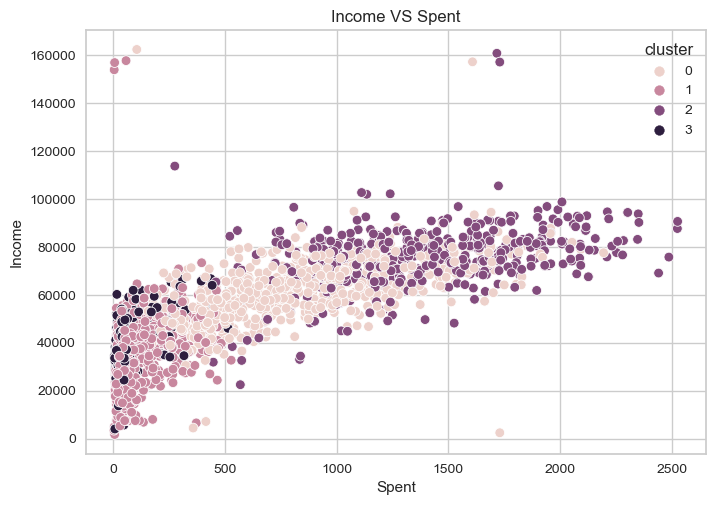

In [128]:
#scatterplot showing income and spenting
sns.scatterplot(data=data,x=data.Spent,y=data.Income,hue=data.cluster)
plt.title('Income VS Spent')
plt.show()

from the plot,<br>
0-having high income and average spent<br>
1-having average income and low spenting<br>
2-having high income and high spenting<br>
3-having low income and low spent

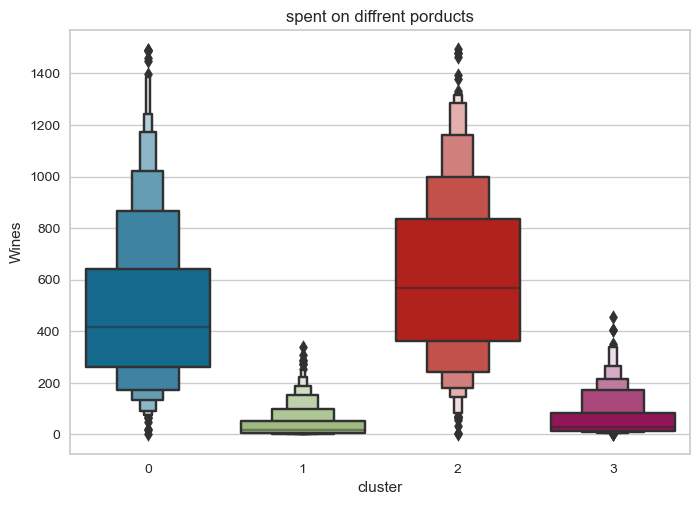

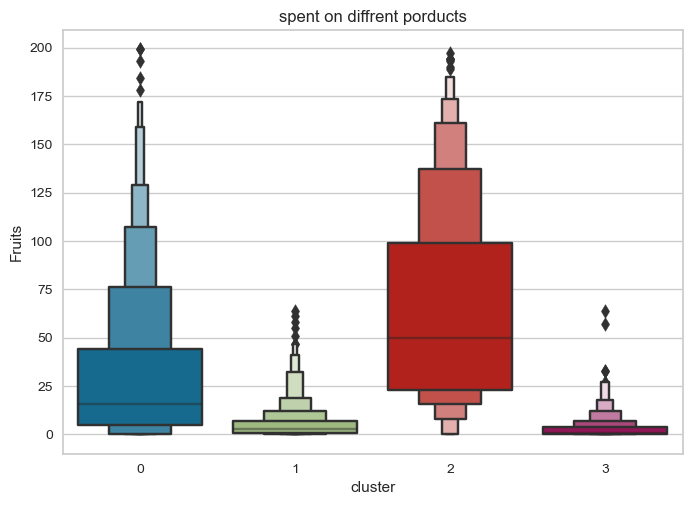

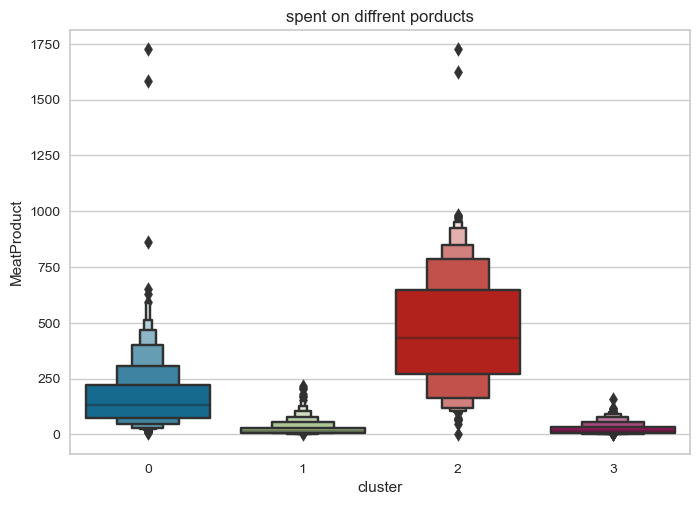

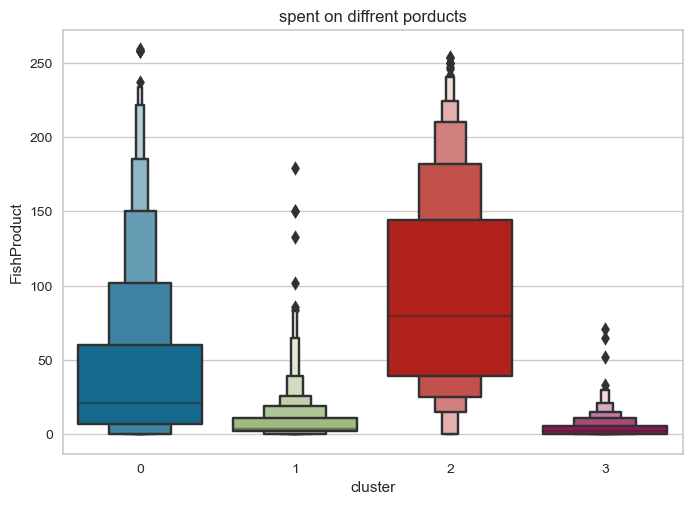

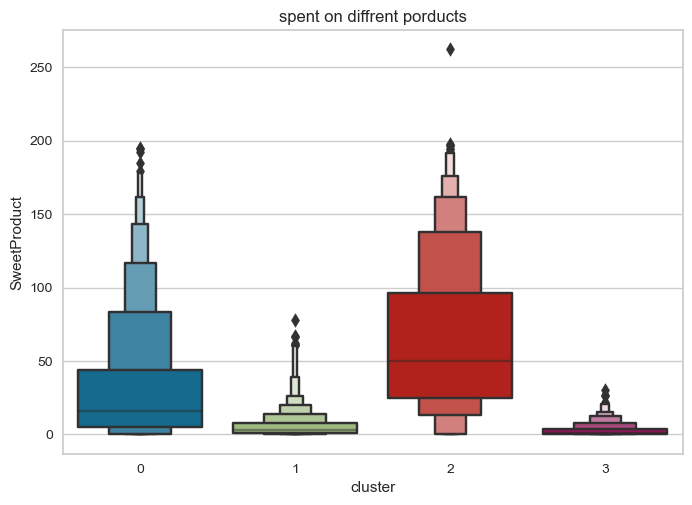

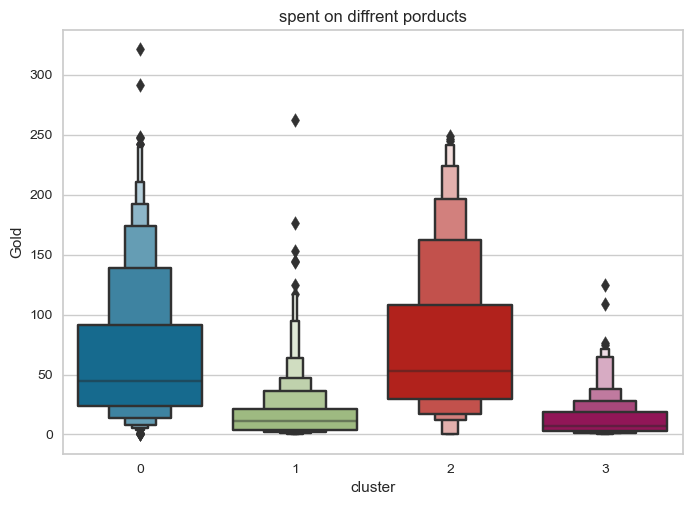

In [138]:
l=['Wines','Fruits','MeatProduct','FishProduct','SweetProduct','Gold']
for i in l:
    sns.boxenplot(x=data['cluster'],y=data[i])
    plt.title("spent on diffrent porducts")
    plt.show()

from this it is clear that cluster 2 is our star customers and cluster 1 and 3 is the weakest

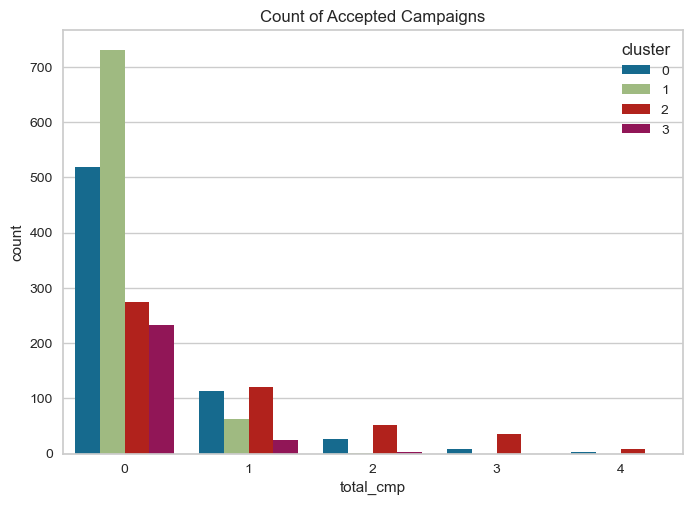

In [141]:
#analysing based on campaigns and deals
data['total_cmp']=data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']
sns.countplot(x=data['total_cmp'],hue=data.cluster)
plt.title('Count of Accepted Campaigns')
plt.show()

It is clear from here that campaigns do not have a significant impact on every cluster

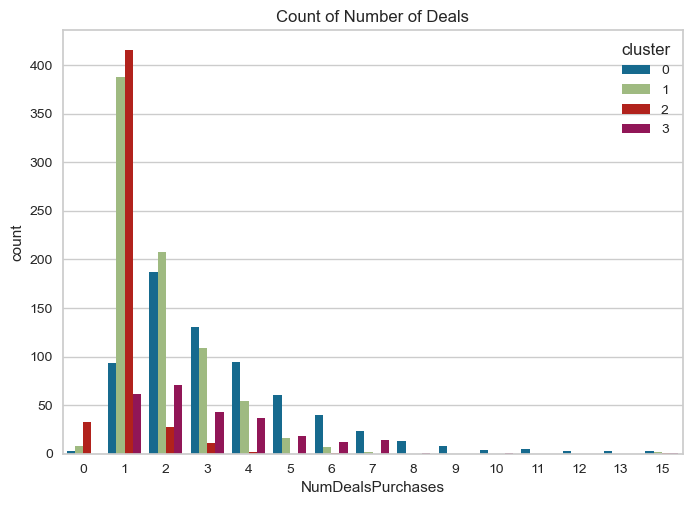

In [143]:
#analysis based no deal purchased
sns.countplot(x=data['NumDealsPurchases'],hue=data.cluster)
plt.title("Count of Number of Deals")
plt.show()

it shows that majority of clusters purchased atleast 1 deal

### Profiling

From the above evaluation, we've gained insight into the star customers and what we should prioritize. Now, we'll conclude by analyzing the personal traits of the clusters.

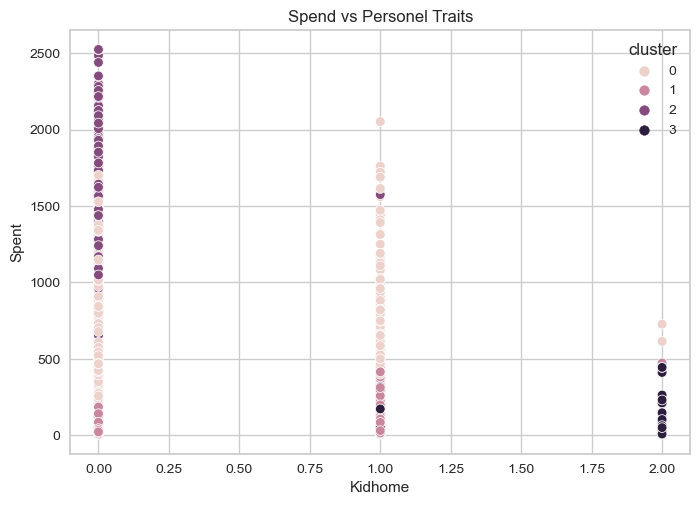

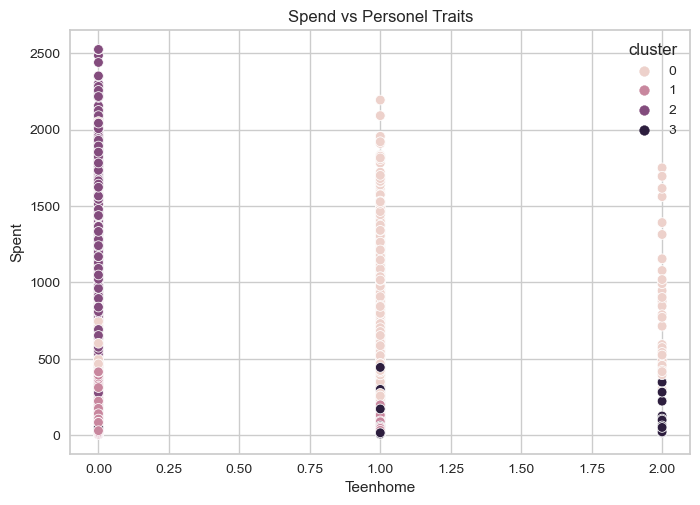

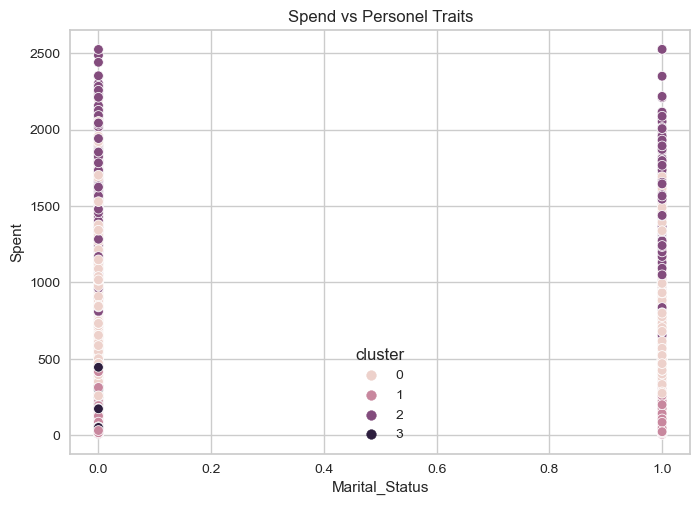

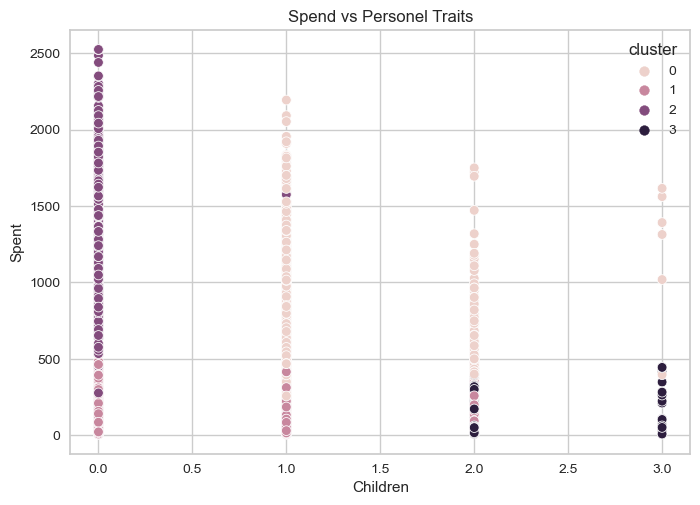

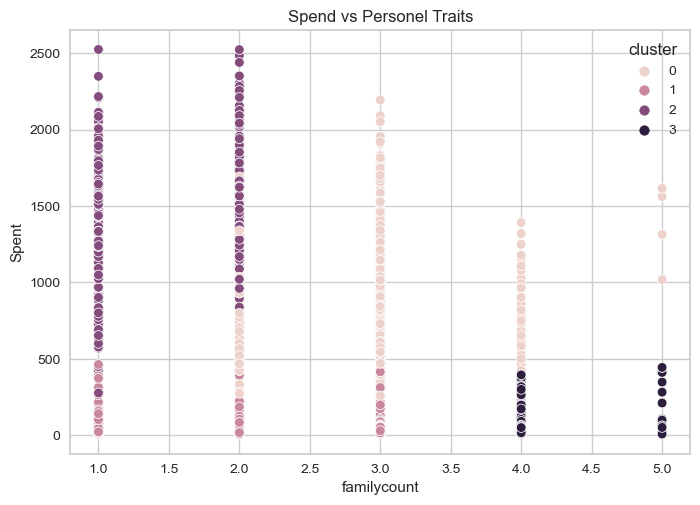

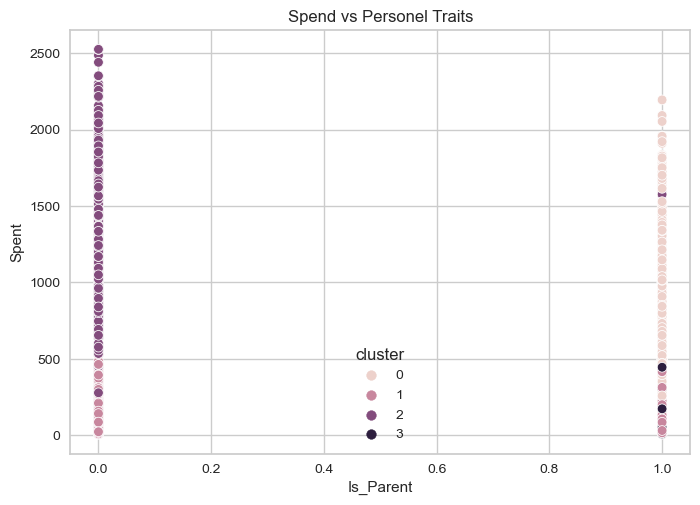

In [150]:
l=['Kidhome','Teenhome','Marital_Status','Children','familycount','Is_Parent']
for i in l:
    sns.scatterplot(x=data[i],y=data.Spent,hue=data.cluster)
    plt.title("Spend vs Personel Traits")
    plt.show()
    

Profiling the clusters<br>
About 0 cluster<br>
Having high income and has a average spent<br>
Most of them are parents and majority of them have a teenager in home<br>
Most of them have 3 members in the family and rest varies from 2 to 5<br>
<br>
About 1 cluster<br>
Having average income and low spenting<br>
Majority of them are single and rest have family members upto 3 <br>
Almost half of them have no child but rest have 1 or 2 childern<br>
<br>
About 2 cluster<br>
Having high income and high spent<br>
They are not parents<br>
Family contain 1 or 2 members<br>
<br>
About 3 cluster<br>
Having low income and low spent<br>
Most of them have 2 kids and 2 teenagers in home<br>
Have 4 or 5 family members





